<a href="https://colab.research.google.com/github/Sourav-Alakkadan/ML-Tasks/blob/master/Cognorise/TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

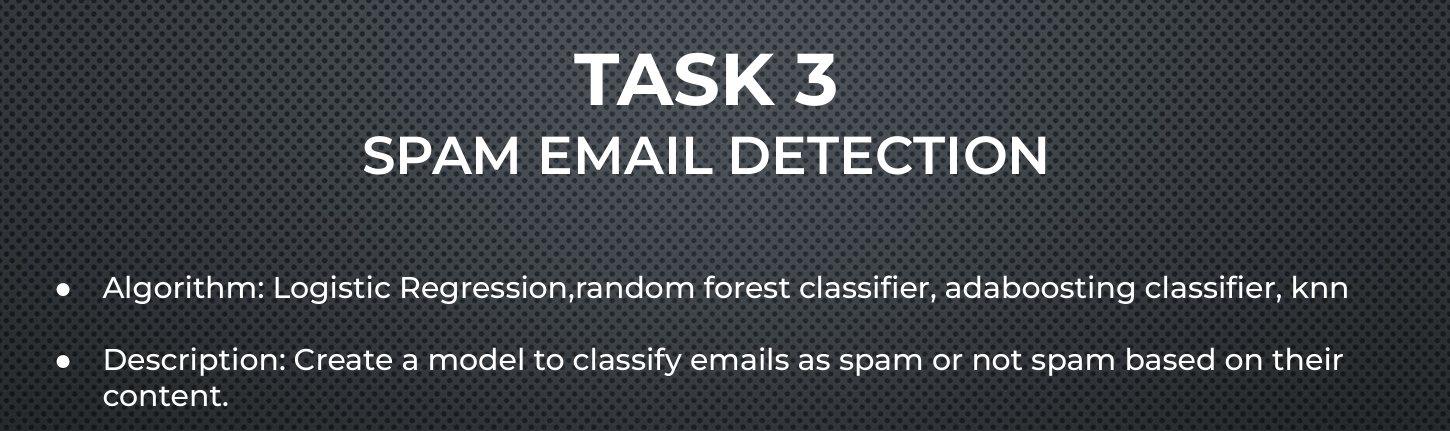

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [71]:
data=pd.read_csv('/content/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [72]:
data.shape

(5572, 2)

In [73]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [76]:
data.dtypes

Category    object
Message     object
dtype: object

In [77]:
data['Category'].unique()

array(['ham', 'spam'], dtype=object)

<Axes: xlabel='count', ylabel='Category'>

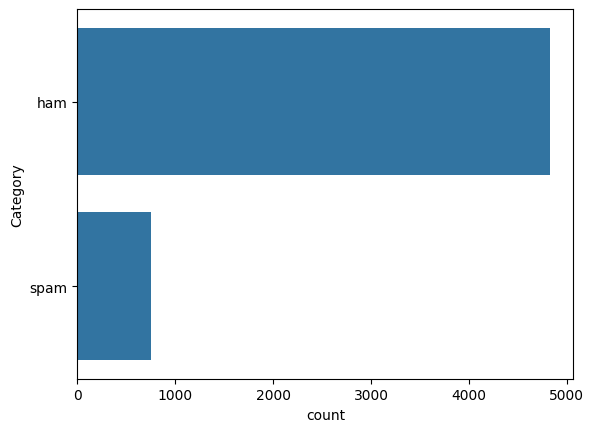

In [78]:
sns.countplot(data['Category'])

In [79]:
data['Category']=data['Category'].map({'ham':0,'spam':1})
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [80]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [81]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [82]:
email=data.Message
email

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [83]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
email=email.apply(lambda x: tk.tokenize(x)).apply(lambda x:" ".join(x))
email

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [84]:
email=email.str.replace('[^a-zA-Z0-9+]',' ')
email

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will ü b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [85]:
from nltk.tokenize import word_tokenize
email=email.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
email

0       until jurong point crazy Available only bugis ...
1                              lar ... Joking wif oni ...
2       Free entry wkly comp win Cup final tkts 21st M...
3              dun say early hor ... already then say ...
4         Nah n't think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569     Pity was mood for that ... any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5572, dtype: object

In [86]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
email=email.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
email

0       until jurong point crazi avail onli bugi great...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3              dun say earli hor ... alreadi then say ...
4           nah n't think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569         piti was mood for that ... ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: Message, Length: 5572, dtype: object

In [87]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
email=email.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
email

0       jurong point crazi avail onli bugi great world...
1                                lar ... joke wif oni ...
2       free entri wkli comp win cup final tkts 21st m...
3                   dun say earli hor ... alreadi say ...
4                nah n't think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                            piti mood ... ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data1=vec.fit_transform(email)
data1

<5572x7082 sparse matrix of type '<class 'numpy.float64'>'
	with 44686 stored elements in Compressed Sparse Row format>

In [89]:
print(data1)

  (0, 6766)	0.20203047130059745
  (0, 1040)	0.3657318424884653
  (0, 3025)	0.16954368353003973
  (0, 1811)	0.3089717384520193
  (0, 1581)	0.34913057628928906
  (0, 6940)	0.24517543868729555
  (0, 3063)	0.20165655308257646
  (0, 1583)	0.3089717384520193
  (0, 4597)	0.17518120543397994
  (0, 1227)	0.2757692060536668
  (0, 2013)	0.28323413617381227
  (0, 4902)	0.249729434431227
  (0, 3630)	0.3657318424884653
  (1, 4595)	0.5892230337773975
  (1, 6863)	0.4625935436300812
  (1, 3599)	0.49506982696691904
  (1, 3764)	0.44014690307313215
  (2, 78)	0.26925934551321457
  (2, 1112)	0.19168304296989988
  (2, 5161)	0.19168304296989988
  (2, 6497)	0.14252905753185302
  (2, 5930)	0.22548435271094622
  (2, 5118)	0.18908621197977196
  (2, 5200)	0.1851828562535381
  (2, 797)	0.253129013723142
  :	:
  (5567, 5024)	0.21171733783428417
  (5567, 4783)	0.22663155057988257
  (5567, 4597)	0.17477199961925954
  (5568, 2538)	0.782681381846728
  (5568, 2987)	0.43953417232463426
  (5568, 3265)	0.4407034897404325
  

In [91]:
y=data['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data1,y,test_size=0.30,random_state=42)
x_train

<3900x7082 sparse matrix of type '<class 'numpy.float64'>'
	with 31460 stored elements in Compressed Sparse Row format>

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=7)
lr=LogisticRegression(solver='saga',max_iter=100)
rf=RandomForestClassifier(n_estimators=100,random_state=42)
ab=AdaBoostClassifier(n_estimators=50,random_state=42)
lst=[knn,lr,rf,ab]

In [96]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Model is',i)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

Model is KNeighborsClassifier(n_neighbors=7)
0.8911483253588517
[[1448    0]
 [ 182   42]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1448
           1       1.00      0.19      0.32       224

    accuracy                           0.89      1672
   macro avg       0.94      0.59      0.63      1672
weighted avg       0.90      0.89      0.86      1672

Model is LogisticRegression(solver='saga')
0.9575358851674641
[[1447    1]
 [  70  154]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1448
           1       0.99      0.69      0.81       224

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

Model is RandomForestClassifier(random_state=42)
0.979066985645933
[[1448    0]
 [  35  189]]
              precision    recall  f1-score   support

           0     